In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('multiple-lr-data.csv')
df.head()

,age,credit-rating,children,loan
0,19,27.900,0,16884.92400
1,18,42.130,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [4]:
df

,age,credit-rating,children,loan
0,19,27.900,0,16884.92400
1,18,42.130,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [5]:
y = df['loan']
x = df[['age','credit-rating','children']]

In [6]:
linear_regresaa = LinearRegression()

In [7]:
linear_regresaa.fit(x,y)

LinearRegression()

In [8]:
y_pred = linear_regresaa.predict(x)
y_pred

array([ 6905.67009648, 11905.93561283, 12380.97319543, ...,
        9619.93282423,  6693.03658583, 17384.88715381])

In [9]:
mean_squared_error(y,y_pred)

128979704.46042567

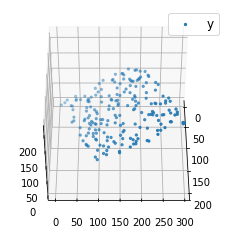

In [10]:
import numpy as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def generate_dateset(n):
    x=[]
    y=[]
    random_x1 = np.random.rand()
    random_x2 = np.random.rand()
    for i in range(n):
        x1 = i
        x2=i/2+np.random.rand()*n
        x.append([1,x1,x2])
        y.append([random_x1*x1+random_x2*x2+1])
    return np.array(x),np.array(y)
x,y = generate_dateset(200)

mpl.rcParams['legend.fontsize']=12
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(x[:,1],x[:,2],y,label='y',s=5)
ax.legend()
ax.view_init(45,0)
plt.show()

In [11]:
def mse(coef,x,y):
    return np.mean((np.dot(x,coef)-y)**2)/2
def gradients(coef, x,y):
    return np.mean(x.transpose()*(np.dot(x,coef)-y), axis=1)

def mulilinear_regression(coef, x,y,lr,b1=0.9,b2=0.999, epsilon=1e-8):
    prev_error=0
    m_coef=np.zeros(coef.shape)
    v_coef=np.zeros(coef.shape)
    moment_m_coef=np.zeros(coef.shape)
    moment_v_coef=np.zeros(coef.shape)
    t=0

    while True:
        error=mse(coef,x,y)
        if abs((error-prev_error)<=epsilon):
            break
        prev_error=error
        grad=gradients(coef,x,y)
        t+=1
        m_coef=b1*m_coef+(1-b1)*grad
        v_coef=b2*v_coef+(1-b2)*grad**2
        moment_m_coef=m_coef/(1-b1**t)
        moment_v_coef=v_coef/(1-b2**t)
        delta=((lr/moment_v_coef**0.5+1e-8)*(b1*moment_m_coef+(1-b1)*grad/(1-b1**t)))
        coef=np.subtract(coef, delta)
    return coef

coef=np.array([0,0,0])
c=mulilinear_regression(coef, x,y,1e-1)
fig=plt.figure()
ax=fig.gca(projection='3d')


ax.scatter(x[:,1],x[:,2],y,label='y',s=5,color="dodgerblue")
ax.scatter(x[:,1],x[:,2],c[0]+c[1]*x[:,1]+c[2]*x[:,2],label='regression',s=5,color="orange")
ax.view_init(45,0)
ax.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (3,200) (200,200) 